In [1]:
#with these we can print variables 'inline'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#%matplotlib notebook 
#--> used for animation in cell
#%matplotlib ipympl

#with tk plots appear as pop-up windows
%matplotlib tk  
#-->used for plot/animation appearing as pop-up

#%matplotlib inline 
#--> used for static plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# 1D Random Walk

### random generator - fair draws of N steps

In [3]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

generator used: [random.choice()](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy.random.choice)

In [4]:
N = 10**4 #number of steps

stepsChoice = np.random.choice((-1.0,1.0), N, p=[0.5,0.5]) #I choose N time uniformly between -1 and 1

#printout
stepsChoice
len(stepsChoice)

array([ 1.,  1.,  1., ..., -1.,  1., -1.])

10000

In [5]:
#checks on uniformity
nplus = [stepsChoice<0][0].sum() #number of forward steps
nplus
nminus = [stepsChoice>0][0].sum() #number of bacward steps
nminus

5042

4958

### trajectory construction - using cumsum

In [6]:
help(np.cumsum)

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-type` for

In [7]:
path = stepsChoice.cumsum()
path
len(path)

array([  1.,   2.,   3., ..., -84., -83., -84.])

10000

### max and min

In [8]:
maxRight = np.max(path)
i_maxRight = np.argmax(path)

maxLeft = np.min(path)
i_maxLeft = np.argmin(path)

print(f"""Extremal values of the walk:
 - {maxRight} reached at step number {i_maxRight+1}
 - {maxLeft} reached at step number {i_maxLeft+1} """)

Extremal values of the walk:
 - 13.0 reached at step number 1113
 - -112.0 reached at step number 6270 


In [9]:
specialSteps = np.where(path==20)
specialSteps #steps at wich the walker was in x=20

(array([], dtype=int64),)

### plot

<IPython.core.display.Javascript object>


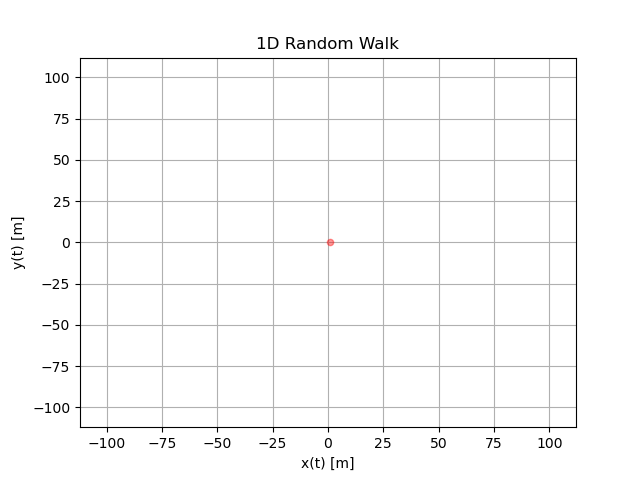

Text(0.5, 0, 'x(t) [m]')

Text(0, 0.5, 'y(t) [m]')

Text(0.5, 1.0, '1D Random Walk')

In [10]:
x = path                   #information about the walk
y = np.zeros(np.shape(x))  #(it is only 1D)

maxSize = max((-maxLeft,maxRight))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-maxSize, maxSize), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("1D Random Walk")

#startup of animation
tail, *_ = ax.plot(x[0], y[0], '.', lw=0.5, markersize=9, color='red',alpha=0.4)
cursor, *_ = ax.plot([], [], 'o-', lw=2, markersize=10, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    if i>10: tail.set_data(x[i-10:i], y[i-10:i]) #we draw a vanishing tail behind the cursor
    else: tail.set_data(x[:i], y[:i])
    cursor.set_data(x[i], y[i])
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tail, cursor, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=100, blit=True, repeat=True)

#we look at the gif
plt.show() 

# Statistics on 1D random walks

### array of random walks

In [11]:
nSteps = 10**3 #number of steps
nWalks = 10**3

#array in shape: walks x steps
stepsChoice = np.random.choice((-1,1), (nWalks,nSteps), p=[0.5,0.5]) #I choose N time uniformly between -1 and 1
stepsChoice

#I sum along the steps direction
path = stepsChoice.cumsum(axis=1) 
path

array([[ 1, -1, -1, ..., -1,  1,  1],
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1,  1, -1, ..., -1,  1,  1],
       [-1,  1, -1, ..., -1,  1, -1],
       [ 1, -1,  1, ...,  1, -1,  1]])

array([[  1,   0,  -1, ...,  -4,  -3,  -2],
       [ -1,   0,  -1, ...,  12,  11,  10],
       [  1,   0,  -1, ...,  18,  17,  16],
       ...,
       [ -1,   0,  -1, ...,  26,  27,  28],
       [ -1,   0,  -1, ..., -28, -27, -28],
       [  1,   0,   1, ...,  14,  13,  14]])

### furthest walker and walkers distances

In [12]:
#first i get an array of maximum distances, then get the index of the biggest
i_maxWalker = np.argmax(np.max(path,axis=1))

print(f"The walker that travelled the furthest is the {i_maxWalker}-th")

The walker that travelled the furthest is the 843-th


In [13]:
#array with max distances
walkerMaxs = np.max(path,axis=1)
walkerMaxs

array([ 35,  42,  24,  29,  50,  14,  41,   4,   4,  12,  15,  31,  26,
        59,  18,  18,  35,  16,   7,  31,  12,  35,  14,  36,  20,  50,
        47,   8,  23,   5,   4,  39,   7,  45,  16,  19,   4,  63,  25,
         1,  25,  49,  37,  33,  21,  42,  41,  36,  49,  32,   4,   2,
         4,  13,  25,   5,   1,  32,  28,   5,   9,  10,  34,  40,   2,
        21,   0,   1,  54,   7,  20,  31,  68,   4,  33,  13,  36,   8,
        16,   0,   5,  62,  35,  32,  35,  22,  35,  35,   8,   6,  63,
        10,  43,  20,  64,  24,  43,  85,  17,  30,  14,  14,  34,  15,
        26,   9,  72,  16,  48,  73,  18,  18,  26,   4,  24,  20,  18,
        44,  11,  64,  48,   7,  37,   4,  22,  45,  91,  45,  43,  18,
        49,  17,  41,  18,  40,  41,  12,   2,  39,  34,   2,  66,  34,
        52,  11,  16,   9,  17,   9,  -1,  -1,   8,   0,  -1,  34,  21,
        24,  36,   3,  52,  17,   7,  52,  27,  30,  17,  22,   6,  45,
         8,  16,   1,  25,  18,  29,   3,  10,  41,   8,  19,  2

### histograms

<IPython.core.display.Javascript object>


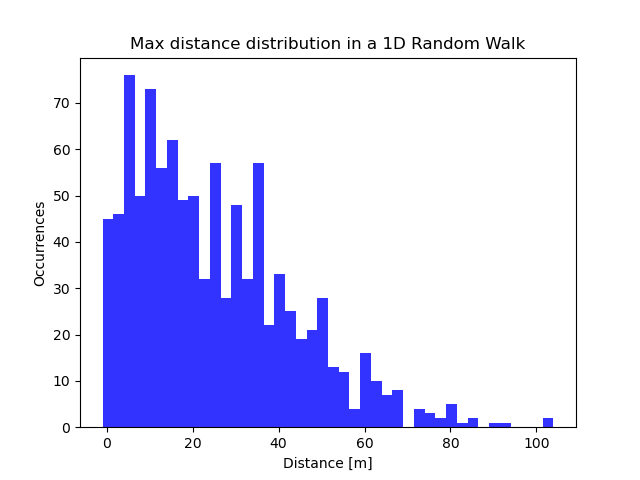

Text(0.5, 0, 'Distance [m]')

Text(0, 0.5, 'Occurrences')

Text(0.5, 1.0, 'Max distance distribution in a 1D Random Walk')

In [14]:
#distribution of max distance

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111)
ax.set_xlabel("Distance [m]")
ax.set_ylabel("Occurrences")
plt.title("Max distance distribution in a 1D Random Walk")

n, bins, _ = plt.hist(walkerMaxs,bins= int(len(set(walkerMaxs))*0.5),facecolor='blue',alpha=0.8)

In [15]:
allDist = path.flatten() #1D array with all distances 
allDist

finalDist = path[:,-1] #1D with final distances
finalDist

array([ 1,  0, -1, ..., 14, 13, 14])

array([  -2,   10,   16,   18,   36,   -6,   20,  -18,  -38,  -34,    2,
          8,    2,   54,  -18,  -26,    8,  -20,  -42,  -32,  -18,   26,
         -2,  -16,  -10,   44,  -12,  -32,  -40,  -14,  -18,   -8,  -32,
         28,  -24,   -2,  -38,   38,    2,  -34,   -2,  -14,   30,  -12,
         10,   -4,   24,   36,   42,    6,   -8,  -46,  -16,    4,   -4,
        -32,  -56,   10,   -2,  -18,    0,  -18,   30,   40,  -16,   -4,
        -54,  -54,   48,    6,    4,  -22,   58,  -32,   20,  -16,  -10,
         -6,  -32,  -40,   -2,   56,   24,   24,  -38,  -18,   12,   10,
        -28,    2,   48,  -12,   26,    6,   56,   12,   40,   82,  -28,
         10,    6,  -38,   26,  -42,   14,   -8,   60,  -50,   30,   56,
          4,  -32,   16,  -50,    8,  -28,  -22,   24,  -48,   64,   32,
        -24,   30,  -56,  -38,   36,   82,  -14,   40,  -18,    2,   -2,
         40,  -18,   14,   36,  -28,  -18,   36,   32,  -46,   50,   32,
         32,   -6,  -20,  -44,   -8,    4,  -20,  -

<IPython.core.display.Javascript object>


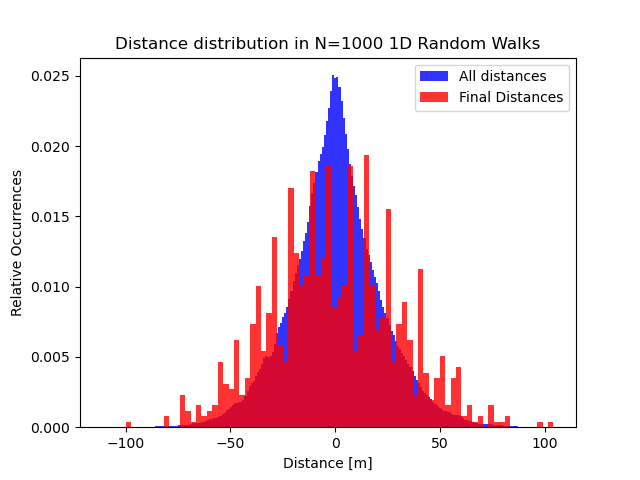

Text(0.5, 0, 'Distance [m]')

Text(0, 0.5, 'Relative Occurrences')

Text(0.5, 1.0, 'Distance distribution in N=1000 1D Random Walks')

In [16]:
fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111)
ax.set_xlabel("Distance [m]")
ax.set_ylabel("Relative Occurrences")
plt.title(f"Distance distribution in N={nWalks} 1D Random Walks")


n, bins, _ = plt.hist(allDist,bins= int(len(set(allDist))),facecolor='blue', alpha=0.8, density = True, label='All distances')
n, bins, _ = plt.hist(finalDist,bins= int(len(set(finalDist))),facecolor='red', alpha=0.8, density=True, label='Final Distances')

plt.legend()
plt.show()



### Animation of a given walk

<IPython.core.display.Javascript object>


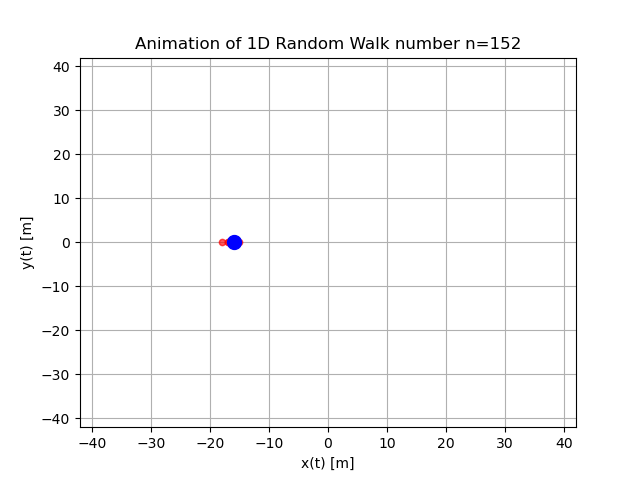

Text(0.5, 0, 'x(t) [m]')

Text(0, 0.5, 'y(t) [m]')

Text(0.5, 1.0, 'Animation of 1D Random Walk number n=152')

In [17]:
n=np.random.randint(0,path.shape[0]) #specific walk I'll animate

x = path[n,:]   #information about the walk
y = np.zeros(np.shape(x))  #(it is only 1D)

maxSize = np.max(np.abs(x))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-maxSize, maxSize), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title(f"Animation of 1D Random Walk number n={n}")

#startup of animation
tail, *_ = ax.plot(x[0], y[0], '.', lw=0.5, markersize=9, color='red',alpha=0.4)
cursor, *_ = ax.plot([], [], 'o-', lw=2, markersize=10, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    if i>10: tail.set_data(x[i-10:i], y[i-10:i]) #we draw a vanishing tail behind the cursor
    else: tail.set_data(x[:i], y[:i])
    cursor.set_data(x[i], y[i])
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tail, cursor, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=10, blit=True, repeat=True)

#we look at the gif
plt.show() 

### Static and animated plots

<IPython.core.display.Javascript object>


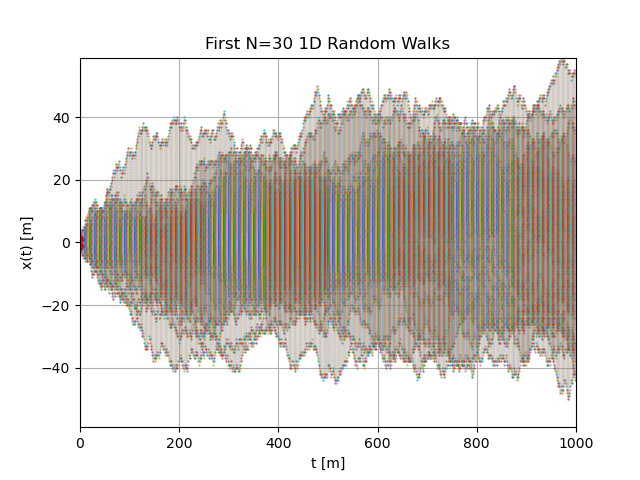

Text(0.5, 0, 't [m]')

Text(0, 0.5, 'x(t) [m]')

Text(0.5, 1.0, 'First N=30 1D Random Walks')

In [18]:
#static plot
Nmax_walk = 30  #we just animate the first 10 walks


maxSize = np.max(np.abs(path[:Nmax_walk,:]))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, nWalks), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("t [m]")
ax.set_ylabel("x(t) [m]")
plt.title(f"First N={Nmax_walk} 1D Random Walks")


xList = path[:Nmax_walk,:]         #coordinates of rnd walks
tList = np.ones(np.shape(xList)).cumsum(axis=1)  #y is 0 by default

plt.plot(tList,xList,linestyle='dashed',lw=0.1,marker='o',markersize=0.5)


tailList, *_ = ax.plot(tList[:,0], xList[:,0], '.', lw=0.1, markersize=8, color='red',alpha=0.2)
cursorList, *_ = ax.plot([], [], 'o', lw=1, markersize=9, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    tail=True
    if tail:
        if i>10: tailList.set_data(tList[:,i-10:i], xList[:,i-10:i]) #we draw a vanishing tail behind the cursor
        else: tailList.set_data(tList[:,:i], xList[:,:i])
    else: tailList.set_data([], [])
    cursorList.set_data(tList[:,i], xList[:,i])
        
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tailList, cursorList, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, xList.shape[1]), interval=10, blit=True, repeat=True)

#we look at the gif
plt.show() 


In [19]:
#anim.save('animatedFigure_1.gif')

<IPython.core.display.Javascript object>


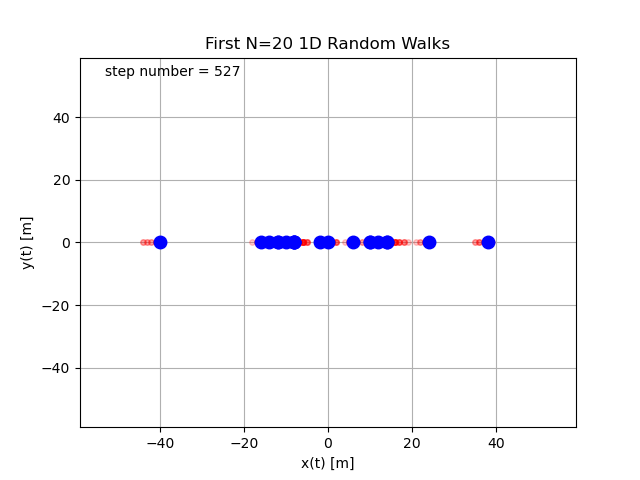

Text(0.5, 0, 'x(t) [m]')

Text(0, 0.5, 'y(t) [m]')

Text(0.5, 1.0, 'First N=20 1D Random Walks')

In [20]:
#animated plot
Nmax_walk = 20  #we just animate the first 10 walks


maxSize = np.max(np.abs(path[:Nmax_walk,:]))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-maxSize, maxSize), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title(f"First N={Nmax_walk} 1D Random Walks")

#startup of animation

xList = path[:Nmax_walk,:]         #coordinates of rnd walks
yList = np.zeros(np.shape(xList))  #y is 0 by default


tailList, *_ = ax.plot(xList[:,0], yList[:,0], '.', lw=0.4, markersize=8, color='red',alpha=0.2)
cursorList, *_ = ax.plot([], [], 'o', lw=1, markersize=9, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    tail=True
    if tail:
        if i>10: tailList.set_data(xList[:,i-10:i], yList[:,i-10:i]) #we draw a vanishing tail behind the cursor
        else: tailList.set_data(xList[:,:i], yList[:,:i])
    else: tailList.set_data([], [])
    cursorList.set_data(xList[:,i], yList[:,i])
        
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tailList, cursorList, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, xList.shape[1]), interval=10, blit=True, repeat=True)

#we look at the gif
plt.show() 



In [21]:
#anim.save('1d_N20.gif') #I save the gif

### Gaussian noise

In [23]:
nSteps = 10**3 #number of steps
nWalks = 10**3

#array in shape: walks x steps
stepsChoice = np.random.choice((-1.0,1.0), (nWalks,nSteps), p=[0.5,0.5]) #I choose N time uniformly between -1 and 1
stepsChoice

#I sum along the steps direction
path = stepsChoice.cumsum(axis=1) 
path

#generate a gaussian noise at each step
noise = np.random.normal(loc=0.0,scale=0.5,size = path.shape)
noise

path = path+noise
path

array([[-1.,  1., -1., ..., -1., -1., -1.],
       [-1., -1.,  1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1.,  1., -1.],
       ...,
       [ 1., -1.,  1., ...,  1., -1., -1.],
       [-1., -1., -1., ..., -1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.]])

array([[ -1.,   0.,  -1., ..., -18., -19., -20.],
       [ -1.,  -2.,  -1., ...,  40.,  39.,  38.],
       [  1.,   0.,  -1., ..., -50., -49., -50.],
       ...,
       [  1.,   0.,   1., ..., -14., -15., -16.],
       [ -1.,  -2.,  -3., ..., -12., -11., -10.],
       [  1.,   2.,   3., ..., -20., -19., -18.]])

array([[ 3.44411610e-01, -1.23213977e+00,  1.23587580e-01, ...,
        -6.31024965e-02, -4.84814307e-01,  2.27465862e-01],
       [ 5.30932144e-01,  4.67444012e-01, -7.30918237e-01, ...,
         9.18736508e-04,  1.66664987e-01, -6.31828599e-01],
       [-5.41104489e-01,  9.15358109e-01,  3.68958353e-01, ...,
         6.87301759e-01, -1.80059678e-01,  7.52306095e-01],
       ...,
       [-2.18622403e-01,  5.43689717e-01,  3.89909916e-01, ...,
         1.62502495e-01,  6.29582090e-01, -2.95113249e-02],
       [-2.43546495e-02,  4.40451816e-01,  4.20808001e-01, ...,
        -3.46487956e-01,  4.16539291e-01, -2.70674441e-02],
       [ 2.24351758e-01,  1.49466537e-01,  4.96550047e-01, ...,
        -5.32011612e-01,  2.33753506e-01, -7.80224282e-02]])

array([[ -0.65558839,  -1.23213977,  -0.87641242, ..., -18.0631025 ,
        -19.48481431, -19.77253414],
       [ -0.46906786,  -1.53255599,  -1.73091824, ...,  40.00091874,
         39.16666499,  37.3681714 ],
       [  0.45889551,   0.91535811,  -0.63104165, ..., -49.31269824,
        -49.18005968, -49.2476939 ],
       ...,
       [  0.7813776 ,   0.54368972,   1.38990992, ..., -13.83749751,
        -14.37041791, -16.02951132],
       [ -1.02435465,  -1.55954818,  -2.579192  , ..., -12.34648796,
        -10.58346071, -10.02706744],
       [  1.22435176,   2.14946654,   3.49655005, ..., -20.53201161,
        -18.76624649, -18.07802243]])

<IPython.core.display.Javascript object>


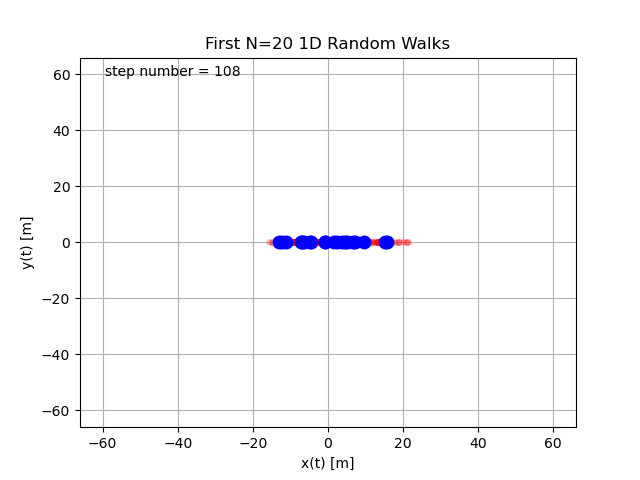

Text(0.5, 0, 'x(t) [m]')

Text(0, 0.5, 'y(t) [m]')

Text(0.5, 1.0, 'First N=20 1D Random Walks')

In [24]:
#animated plot (just position)
Nmax_walk = 20  #we just animate the first 20 walks


maxSize = np.max(np.abs(path[:Nmax_walk,:]))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-maxSize, maxSize), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title(f"First N={Nmax_walk} 1D Random Walks")

#startup of animation

xList = path[:Nmax_walk,:]         #coordinates of rnd walks
yList = np.zeros(np.shape(xList))  #y is 0 by default


tailList, *_ = ax.plot(xList[:,0], yList[:,0], '.', lw=0.4, markersize=8, color='red',alpha=0.2)
cursorList, *_ = ax.plot([], [], 'o', lw=1, markersize=9, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    tail=True
    if tail:
        if i>10: tailList.set_data(xList[:,i-10:i], yList[:,i-10:i]) #we draw a vanishing tail behind the cursor
        else: tailList.set_data(xList[:,:i], yList[:,:i])
    else: tailList.set_data([], [])
    cursorList.set_data(xList[:,i], yList[:,i])
        
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tailList, cursorList, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, xList.shape[1]), interval=10, blit=True, repeat=True)

#we look at the gif
plt.show() 

<IPython.core.display.Javascript object>


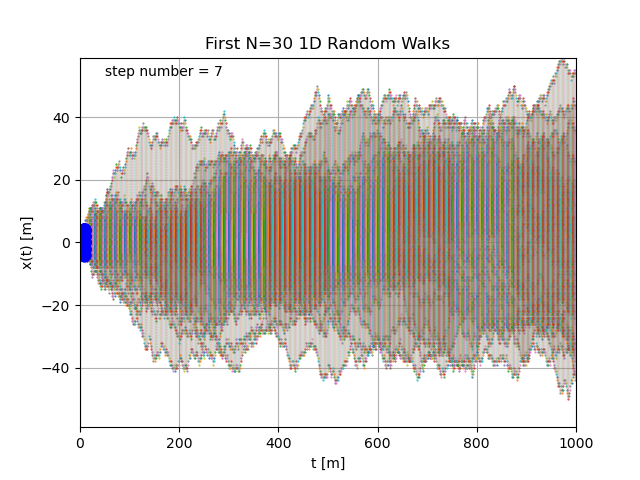

Text(0.5, 0, 't [m]')

Text(0, 0.5, 'x(t) [m]')

Text(0.5, 1.0, 'First N=30 1D Random Walks')

In [23]:
#static+animated plot position vs time
Nmax_walk = 30  #we just animate the first 10 walks


maxSize = np.max(np.abs(path[:Nmax_walk,:]))

fig = plt.figure() #new figure

#figure general setup
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, nWalks), ylim=(-maxSize, maxSize))
ax.grid()
ax.set_xlabel("t [m]")
ax.set_ylabel("x(t) [m]")
plt.title(f"First N={Nmax_walk} 1D Random Walks")


xList = path[:Nmax_walk,:]         #coordinates of rnd walks
tList = np.ones(np.shape(xList)).cumsum(axis=1)  #y is 0 by default

plt.plot(tList,xList,linestyle='dashed',lw=0.1,marker='o',markersize=0.5)


tailList, *_ = ax.plot(tList[:,0], xList[:,0], '.', lw=0.1, markersize=8, color='red',alpha=0.2)
cursorList, *_ = ax.plot([], [], 'o', lw=1, markersize=9, color='blue')
info_template = 'step number = %.d '
info_text = ax.text(0.05,0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    tail=True
    if tail:
        if i>10: tailList.set_data(tList[:,i-10:i], xList[:,i-10:i]) #we draw a vanishing tail behind the cursor
        else: tailList.set_data(tList[:,:i], xList[:,:i])
    else: tailList.set_data([], [])
    cursorList.set_data(tList[:,i], xList[:,i])
        
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tailList, cursorList, info_text

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)), interval=10, blit=True, repeat=True)

#we look at the gif
plt.show() 

# 3D Random Walks

In [10]:
#I define the elementary steps i take in 3D 
#(to use choice i have to cheat: i add a 1 with 0 probability that will let the function work)
elem_steps = (1,(1.0,0.0,0.0), (1.0,0.0,0.0), (1.0,0.0,0.0), (1.0,0.0,0.0), (1.0,0.0,0.0), (0.0,-1.0,0.0), (0.0,0.0,1.0), (0.0,0.0,-1.0))
probSteps=[0.0,1/8.0,1/8.0,1/8.0,1/8.0,1/8.0,1/8.0,1/8.0,1/8.0]

Nsteps=10**2

steps = np.random.choice(elem_steps,Nsteps,p=probSteps)
path = np.asarray([i for i in steps],dtype=float).cumsum(axis=0)


/tmp/ipykernel_28966/256926636.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  steps = np.random.choice(elem_steps,Nsteps,p=probSteps)


What I did correctly generate a random walk with step over unit vector, however that was not requested.
Dropping the condition that step must be of unit length along x,y or z a simpler solution (ctrl-c ctrl-v from prof solution) is the following:

In [64]:
Nexp = 10
Nsteps = 1000
# To experiment with adding Gaussian noise, change the value below
Noise = 1

options = np.array((-1, 0, 1))
steps = np.random.choice(options, size=(Nexp, Nsteps, 3)) + Noise * np.random.standard_normal((Nexp, Nsteps, 3))
print(steps.shape)

(10, 1000, 3)


In [65]:
#Generating steps on a sphere:
steps = np.random.random(size=(Nexp, Nsteps, 3))-0.5 #random number
nor = np.linalg.norm(steps,axis=2) #normalizaion factor
for i in range(3):
    steps[:,:,i] /= nor #normalized to 1
print(steps.shape)

(10, 1000, 3)


In [66]:
walks = steps.cumsum(axis=1)
print(walks.shape)
print(walks[0,0])

walks = np.insert(walks, 0, 0, axis=1)
print(walks.shape)
print(walks[0,0])

Nsteps = Nsteps + 1

(10, 1000, 3)
[-0.58913684 -0.59492721 -0.54679009]
(10, 1001, 3)
[0. 0. 0.]


In [68]:
#%matplotlib inline

# Randomly select a walk
iexp = np.random.randint(0, Nexp)

fig = plt.figure(figsize=(10,10),dpi=250)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter3D(walks[iexp,:,0], walks[iexp,:,1], walks[iexp,:,2], alpha=0.15, s=5)
p = ax.plot3D(walks[iexp,:,0], walks[iexp,:,1], walks[iexp,:,2], alpha=0.25, lw=3)
col = p[0].get_color()
ax.plot3D(walks[iexp,-1,0], walks[iexp,-1,1], walks[iexp,-1,2], color=col, marker='o', ms=8)
ax.plot3D(walks[iexp,0,0], walks[iexp,0,1], walks[iexp,0,2], marker='*', ms=8, color='k')

plt.title('3D random walk {0} out of {1}'.format(iexp, Nexp));

In [69]:
#%matplotlib notebook
%matplotlib tk

import matplotlib.animation as animation

# Randomly select a walk
iexp = np.random.randint(0, Nexp)

# Create a figure object
fig = plt.figure(figsize=(10,10))

# Add subplot (just 1) and set x and y limits based on data.
# 111 means "1x1 grid, 1st subplot".
# ax is the object containing objects to be plotted.
ax = fig.add_subplot(111, projection='3d', autoscale_on=False)
ax.set_xlim(walks[:,:,0].min(), walks[:,:,0].max())
ax.set_ylim(walks[:,:,1].min(), walks[:,:,1].max())
ax.set_zlim(walks[:,:,2].min(), walks[:,:,2].max())
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D random walk {0} out of {1}'.format(iexp, Nexp))

# 1. Plot the initial state of the plot
i = 0
path, *_ = ax.plot3D(walks[iexp,i,0], walks[iexp,i,1], walks[iexp,i,2], alpha=0.25, lw=3)

# 2. Function to refresh objects in the plot
def refresh(i):
    # Draw the line from 0th -> i-th position
    path.set_data_3d(walks[iexp,:i,0], walks[iexp,:i,1], walks[iexp,:i,2])
    # Return a tuple
    return path,

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'refresh' function
ani = animation.FuncAnimation(fig, refresh, np.arange(1, Nsteps), interval=1, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rendering that makes the animation work on Colab
# (and possibly other machines)
#from matplotlib import rc
# Try html='jshtml' if html='html5' fails
#rc('animation', html='html5')
#ani

(-26.656415003850064, 31.017406886338573)

(-31.243093523974977, 36.40709448210272)

(-39.19304973928138, 34.74870217260843)

Text(0.5, 0, 'x')

Text(0.5, 0.5, 'y')

Text(0.5, 0, 'z')

Text(0.5, 0.92, '3D random walk 0 out of 10')

In [70]:
#%matplotlib inline
%matplotlib tk

# Create a figure object
fig = plt.figure(figsize=(10,10))

# Add subplot (just 1) and set x and y limits based on data.
# 111 means "1x1 grid, 1st subplot".
# ax is the object containing objects to be plotted.
ax = fig.add_subplot(111, projection='3d', autoscale_on=False)
ax.set_xlim(walks[:,:,0].min(), walks[:,:,0].max())
ax.set_ylim(walks[:,:,1].min(), walks[:,:,1].max())
ax.set_zlim(walks[:,:,2].min(), walks[:,:,2].max())
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('{0} 3D random walks'.format(Nexp))

# 1. Plot the initial state of the plot
i = 0
paths = []
particles = []
for j in range(Nexp):
    path, *_ = ax.plot3D(walks[j,i,0], walks[j,i,1], walks[j,i,2], alpha=0.25, lw=3, color='gray')
    paths.append(path)
    particle, *_ = ax.plot3D(walks[j,i,0], walks[j,i,1], walks[j,i,2], 'o', alpha=0.5, markersize=4, color='black')
    particles.append(particle)

# 2. Function to refresh objects in the plot
ihist = 15
def refresh(i):
    # Draw all Nexp lines from the i-th to the (i+ihist)-th position
    for j in range(Nexp):
        paths[j].set_data_3d(walks[j,i:i+ihist,0], walks[j,i:i+ihist,1], walks[j,i:i+ihist,2])
        particles[j].set_data_3d(walks[j,i+ihist,0], walks[j,i+ihist,1], walks[j,i+ihist,2])
    # Return a tuple
    return paths, particles
    
# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'refresh' function
ani = animation.FuncAnimation(fig, refresh, np.arange(1, Nsteps-ihist), interval=1, blit=False, repeat=False)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rendering that makes the animation work on Colab
# (and possibly other machines)
#from matplotlib import rc
# Try html='jshtml' if html='html5' fails
#rc('animation', html='html5')
#ani

(-26.656415003850064, 31.017406886338573)

(-31.243093523974977, 36.40709448210272)

(-39.19304973928138, 34.74870217260843)

Text(0.5, 0, 'x')

Text(0.5, 0.5, 'y')

Text(0.5, 0, 'z')

Text(0.5, 0.92, '10 3D random walks')

In [50]:
'''
fig = plt.figure() #new figure

maxSize = np.max(np.abs(path))

#figure general setup
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-maxSize, maxSize), ylim=(-maxSize, maxSize), zlim=(-maxSize,maxSize))
#ax = Axes3D(fig)
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
ax.set_zlabel("z(t) [m]")
plt.title("3D Random Walks")

#startup of animation

x = path[:,0]        #coordinates of rnd walks
y = path[:,1]
z = path[:,2]

#startup of animation
#tail, *_ = ax.plot(x[0], y[0],z[0], '.', lw=0.5, markersize=9, color='red',alpha=0.4)
cursor = ax.scatter3D([], [], [], 'o-', lw=2, color='blue')
#info_template = 'step number = %.d '
#info_text = ax.text(0.05, 0.95, 0.95,'', transform=ax.transAxes)

#function to update the plot
def update_plots(i):
    '''
    '''
    if i>10: 
        tail.set_data(x[i-10:i], y[i-10:i]) #we draw a vanishing tail behind the cursor
        tail.set_3d_properties(z[i-10:i])
    else: 
        tail.set_data(x[:i], y[:i])
        tail.set_3d_properties( z[:i])
    '''
    '''
    #cursor.set_data(x[i], y[i])
    #cursor.set_3d_properties((z[i]))
    cursor._offsets3d = (x[i],y[i],z[i])
    #we update te step cpunter
    #info_text.set_text(info_template % (i))
    # Return a tuple
    #return tail, cursor, info_text
    return cursor

#animation of the plot
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, Nsteps), interval=10, blit=True, repeat=True)

#we look at the gif
#plt.show() 
'''

IndentationError: unexpected indent (1395067230.py, line 30)

In [ ]:
'''
#function to update the plot
def update_plots(i):
    if i>10: 
        tail.set_data(x[i-10:i], y[i-10:i]) #we draw a vanishing tail behind the cursor
        tail.set_3d_properties(z[i-10:i])
    else: 
        tail.set_data(x[:i], y[:i])
        tail.set_3d_properties( z[:i])
    cursor.set_data(x[i], y[i])
    cursor.set_3d_properties(z[i])
    #we update te step cpunter
    info_text.set_text(info_template % (i))
    # Return a tuple
    return tail, cursor, info_text

'''